In [72]:
#The below code is used  for visualizing  Multiple attributes data or time-varying data using parallel coordinates plot
#below description explains the code 
#1. The code reads a CSV file containing car attributes such as MPG, cylinders, displacement, horsepower, weight, and acceleration.
#2. It converts the numeric columns to the appropriate data type and then creates a Parallel Coordinates Plot using Plotly Express.
#3. In the visualization, each line represents a car, with attributes plotted along parallel axes, while the color gradient is used to indicate MPG values.



In [73]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("multi-cars2.csv")
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

fig = px.parallel_coordinates(df, color='mpg', title='Parallel Coordinates Plot',
                              labels={'mpg': 'MPG', 'cylinders': 'Cylinders', 'displacement': 'Displacement',
                                      'horsepower': 'Horsepower', 'weight': 'Weight', 'acceleration': 'Acceleration'})
fig.show()


In [74]:
#The below code is used for visualizing  Multiple attributes data or time-varying data using scatterplot matrix
#below description explains the code 
#1. This code imports the required libraries and reads a CSV file containing multiple attributes data related to cars.
#2. It converts the numeric columns to the appropriate data type and then creates a Scatterplot Matrix using Plotly Express.
#3. The Scatterplot Matrix visualizes the relationships between different attributes such as MPG, cylinders, displacement, horsepower, weight, and acceleration, providing insights into their correlations and distributions.





In [75]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("multi-cars2.csv")
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
fig = px.scatter_matrix(df, dimensions=numeric_columns, title='Scatterplot Matrix',
                        labels={'mpg': 'MPG', 'cylinders': 'Cylinders', 'displacement': 'Displacement',
                                'horsepower': 'Horsepower', 'weight': 'Weight', 'acceleration': 'Acceleration'})
fig.show()

In [76]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("Geo-Air_Quality_Dataset.csv")

# Display the first ten rows of the DataFrame
print(df.head(10))


         city            station   latitude  longitude pollutant_id  \
0    A0ntapur          Gulzarpet  14.675886  77.593027          SO2   
1    Chittoor  Gangineni Cheruvu  13.204880  79.097889          SO2   
2    Tirupati           Tirumala  13.670000  79.350000          NH3   
3    Tirupati           Tirumala  13.670000  79.350000           CO   
4    Tirupati           Tirumala  13.670000  79.350000        OZONE   
5    Tirupati      Vaikuntapuram  13.615387  79.409230         PM10   
6    Tirupati      Vaikuntapuram  13.615387  79.409230           CO   
7  Vijayawada          HB Colony  16.536107  80.594233         PM10   
8  Vijayawada          HB Colony  16.536107  80.594233           CO   
9  Vijayawada  Rajiv Gandhi Park  16.509717  80.612222        PM2.5   

   pollutant_avg  
0              0  
1             12  
2              3  
3             47  
4             34  
5             91  
6             48  
7             46  
8             24  
9             66  


In [77]:
#visualization for dataset Geo-2014_us_cities_1.csv using point map
#the following description explains the below code 
#1. The code loads air quality monitoring data from "Geo-Air_Quality_Dataset.csv".
#2. It creates a point map using Plotly Express, where each point represents a monitoring station with latitude and longitude coordinates.
#3. The map colors points based on average pollutant levels, with additional information available on hover.

In [78]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("Geo-Air_Quality_Dataset.csv")  # Replace "your_dataset.csv" with the path to your CSV file
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="station", hover_data=["city", "pollutant_id", "pollutant_avg"],
                        color="pollutant_avg", color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=15, zoom=4)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Pollution Monitoring Stations")
fig.show()


In [79]:

#the following description explains the below code 
#1. The code loads data from the "Geo-2014_us_cities_1.csv" file, containing information about major cities in the United States, including their latitude, longitude, name, and population.
#2. It utilizes Plotly Express to create a scatter map on a Mapbox map, where each point represents a city plotted at its respective latitude and longitude coordinates.
#3. The size and color of the points represent the population of each city, providing a visual overview of population distribution across major US cities.





In [80]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("Geo-2014_us_cities_1.csv")
fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="name", size="pop", color="pop",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=3)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Population Distribution in Major US Cities")
fig.show()


In [81]:

#the following description explains the below code 
#1. The code reads hierarchical data from a JSON file, "hierarch-Trade_Germany.txt."
#2. It flattens the hierarchical structure into a DataFrame suitable for visualization.
#3. The Sunburst Chart created with Plotly Express depicts the two-level hierarchical data, displaying item and group relationships with color-coded parent categories.

In [82]:
import pandas as pd
import json
import plotly.express as px
file_path = 'hierarch-Trade_Germany.txt'
with open(file_path, 'r') as file:
    hierarchical_data = json.load(file)
def parse_hierarchy(data, parent=None):
    items = []
    for item in data:
        if isinstance(item, dict) and 'name' in item:
            items.append({
                'Parent': parent,
                'Item and Group': item['name'],
                'Weight': 1 # You can adjust the weight as needed
            })
            if 'children' in item:
                items.extend(parse_hierarchy(item['children'], item['name']))
    return items
df = pd.DataFrame(parse_hierarchy(hierarchical_data['children'], hierarchical_data['name']))
fig = px.sunburst(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent')
fig.update_layout(title_text="Two-level Sunburst Diagram", font_size=10)
fig.show()


In [83]:


#the following description explains the below code 
#1. The code reads hierarchical data from a JSON file named "hierarch-Trade_Germany.txt."
#2. It flattens the hierarchical structure into a DataFrame suitable for visualization using Plotly Express.
#3. A TreeMap visualization is created, showcasing the two-level hierarchical data with item and group relationships. The color intensity represents the weight of each category.

In [84]:
import pandas as pd
import json
import plotly.express as px
file_path = 'hierarch-Trade_Germany.txt'
with open(file_path, 'r') as file:
    hierarchical_data = json.load(file)
def parse_hierarchy(data, parent=None):
    items = []
    for item in data:
        if isinstance(item, dict) and 'name' in item:
            items.append({
                'Parent': parent,
                'Item and Group': item['name'],
                'Weight': 1 # You can adjust the weight as needed
            })
            if 'children' in item:
                items.extend(parse_hierarchy(item['children'], item['name']))
    return items
df = pd.DataFrame(parse_hierarchy(hierarchical_data['children'], hierarchical_data['name']))
fig = px.treemap(df, path=['Parent', 'Item and Group'], values='Weight', color='Weight',
                 color_continuous_scale='Blues', title='Two-level TreeMap Diagram')
fig.show()


In [85]:
 
#the following description explains the below code 
#1. Data is loaded from a JSON file containing node and link information for a network.
#2. Using NetworkX, a directed graph is constructed by adding nodes and edges based on the extracted data.
#3. Node positions are determined using the Kamada-Kawai layout algorithm to arrange the nodes spatially.
#4. Plotly is used to create an interactive visualization where nodes are displayed as markers and edges as lines.
#5. The resulting plot allows for exploration of the network structure by hovering over nodes to reveal additional information.

In [86]:
import json
import plotly.graph_objects as go
import networkx as nx
with open('network-miserables.txt', 'r') as file:
    data = json.load(file)
nodes = data['nodes']
links = data['links']
G = nx.DiGraph()
for node in nodes:
    G.add_node(node['id'])
for link in links:
    G.add_edge(link['source'], link['target'])
pos = nx.kamada_kawai_layout(G)
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=10,
        color='lightblue'
    ),
    text=list(G.nodes())
)

edge_trace = go.Scatter(
    x=[pos[edge[0]][0] for edge in G.edges()],
    y=[pos[edge[0]][1] for edge in G.edges()],
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

layout = go.Layout(
    title='Network Visualization',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)


fig.show()


In [87]:


##the following description explains the below code 
#1. The code loads 3D volume data from a file and reshapes it to match the assumed dimensions (depth, height, width).

#2. It randomly samples 70% of the volume data and selects a slice from this subset for visualization. The random sampling is achieved by generating random indices and reshaping the subset data accordingly.

#3. The selected slice is plotted as a 3D scatter plot using Matplotlib, with the intensity of each point represented by different colors using the 'viridis' colormap. The x and y coordinates are generated using meshgrid, and the z coordinate is set to the chosen slice index. Finally, labels and a title are added to the plot, and it is displayed using plt.show().

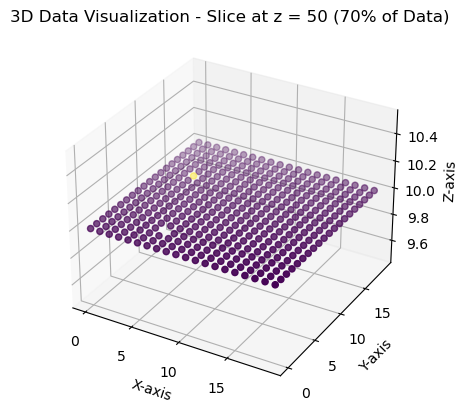

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = "3d-C60.vol"
volume_data = np.fromfile(file_path, dtype=np.float32)
depth, height, width = 20, 20, 20
volume_data = volume_data[:depth * height * width]
volume_data = volume_data.reshape((depth, height, width))

percentage = 0.7
total_points = depth * height * width
selected_points = int(percentage * total_points)
subset_data = volume_data.flatten()[:selected_points]

subset_depth = int(selected_points / (height * width))
subset_height = height
subset_width = width

random_indices = np.random.choice(subset_data.size, size=subset_data.size, replace=False)

subset_data = subset_data[random_indices].reshape((subset_depth, subset_height, subset_width))
random_indices = np.unravel_index(random_indices, (subset_depth, subset_height, subset_width))

z_slice = 10
data_slice = subset_data[z_slice]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(subset_width), np.arange(subset_height))

ax.scatter(x.flatten(), y.flatten(), np.full_like(x.flatten(), z_slice), c=data_slice.flatten(), cmap='viridis')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Data Visualization - Slice at z = 50 (70% of Data)')

plt.show()


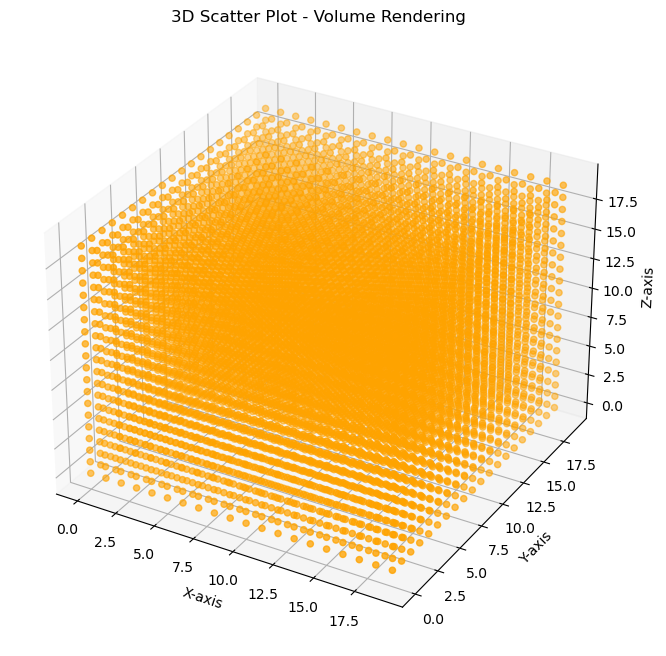

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = "3d-C60.vol"
volume_data = np.fromfile(file_path, dtype=np.float32)
depth, height, width = 20, 20, 20
volume_data = volume_data[:depth * height * width]
volume_data = volume_data.reshape((depth, height, width))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.meshgrid(np.arange(width), np.arange(height), np.arange(depth))
data_flattened = volume_data.flatten()

color = (1.0, 0.64, 0.0)
sc = ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=[color], marker='o')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot - Volume Rendering')

plt.show()


In [90]:
###the following description explains the below code 
#The code loads 3D volume data from a file, reshapes it, and creates a 3D scatter plot using Matplotlib. 
#Each point in the scatter plot corresponds to a voxel in the volume data, with intensity represented by color.
#A colorbar is added to provide intensity reference, and axis labels and a title are set for better interpretation.

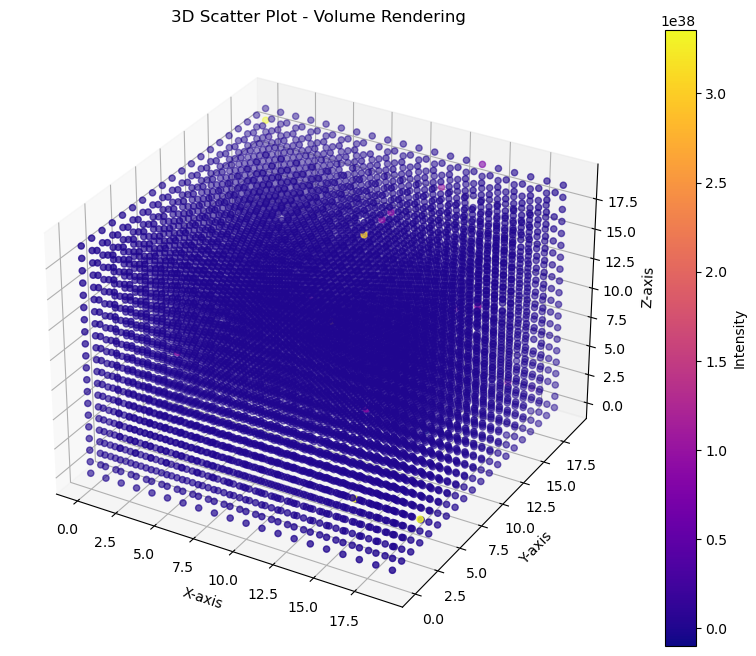

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
file_path = "3d-C60.vol"  
volume_data = np.fromfile(file_path, dtype=np.float32)
depth, height, width = 20, 20, 20  
volume_data = volume_data[:depth * height * width]
volume_data = volume_data.reshape((depth, height, width))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.meshgrid(np.arange(width), np.arange(height), np.arange(depth))
data_flattened = volume_data.flatten()
cmap = 'plasma'  
sc = ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=data_flattened, cmap=cmap, marker='o')
cbar = plt.colorbar(sc)
cbar.set_label('Intensity')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot - Volume Rendering')
plt.show()
